<a href="https://colab.research.google.com/github/jiwoong2/deeplearning/blob/main/Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Affine layer

Affine층은 fully-connected layer, dense layer이라고도 불리며 입력된 벡터에 가중치 행렬(weight matrix)를 곱하고 편향(bias)를 더하는 연산을 수행한다. 딥러닝 모델이 역전파(back propagation)을 통해 학습을 진행하면 각 가중치와 편향은 손실함수(loss function)을 최소화하는 최적값을 찾아가게 된다.
\
\
\
Forward

$Y = XW +B$

$ \begin{pmatrix} y_{1} & y_{2} & y_{3} \\ \vdots & \vdots & \vdots \end{pmatrix} = \begin{pmatrix} x_{1} & x_{2} \\ \vdots & \vdots \end{pmatrix} \begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix}  + \begin{pmatrix} b_{1} & b_{2} & b_{3} \\ \vdots & \vdots & \vdots \end{pmatrix} $

여기서 입력값 X는 2차원 벡터이고 출력값 Y은 3차원벡터이며 위의 수식은 입력값 X의 배치처리를 고려해 확장한 수식이다. 확장된 X행렬은 각행이 배치된 입력값이며 확장된 B행렬은 편향벡터를 배치 수 만큼 각 행에 반복한 행렬이다.(Broadcasting)
\
\
\
Backward

Affine층의 계산그래프는 X와 W의 행렬곱, 그 결과값과 B의 덧셈으로 이루어진다. 주의할 점은 배치처리시 B의 덧셈연산 이전에 Repeat연산(편향벡터를 배치 수 만큼 각행에 반복하는 것)이 추가로 진행된다는 점 이다.
\
\
\
1.덧셈노드의 역전파

흘러들어온 미분이 $\frac{\partial L}{\partial Y}$ 일때 $Y = XW + B$임을 생각해 L에 대한 XW와 B에대한 편미분을 각각 구하면,

$\frac{\partial L}{\partial WX} = \frac{\partial L}{\partial Y} \frac{\partial Y}{\partial WX}$ 이므로 $\frac{\partial L}{\partial WX} = \frac{\partial L}{\partial Y} * 1$ 이 되고,

$\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y} \frac{\partial Y}{\partial B}$ 이므로 $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y} * 1$ 이 된다.
\
\
\
2.행렬곱노드의 역전파

행렬곱노드의 역전파를 이해하기 위해 다음과같은 행렬곱함수 f을 생각한다.

$ \begin{pmatrix} x_1 & x_2 \\ x_3 & x_4 \end{pmatrix} \begin{pmatrix} w_{1} & w_{2} \\ w_{3} & w_{4} \end{pmatrix} = \begin{pmatrix} x_1 w_{1} + x_2 w_{3} & x_1 w_{2} + x_2 w_{4} \\ x_3 w_{1} + x_4 w_{3} & x_3 w_{2} + x_3 w_{4} \end{pmatrix} = \begin{pmatrix} y_1 & y_2 \\ y_3 & y_4 \end{pmatrix} $

여기서 $ \begin{pmatrix} y_1 & y_2 \\ y_3 & y_4 \end{pmatrix} $ 가 손실함수 L에 입력되 최종적으로 스칼라로 반환된다는점을 생각하면 $dL$ 다변수함수의 미분법에 의해

$ dL = \frac{\partial L}{\partial y_1} dy_1 + \frac{\partial L}{\partial y_2} dy_2 + \frac{\partial L}{\partial y_3} dy_3 + \frac{\partial L}{\partial y_4} dy_4$ 로 표현할수 있고, 각각의 $dy_i$들은 다시 $x_i와 w_i$들의 다변수함수 미분법으로 표혈할 수 있을 것이다. 여기서 수식을 줄이기위해 $x_1$에 대한 역전파만 살펴보면 x1의 변화에 대한 각 y원소들의 변화는

$dy_1 = w1,$ $dy_2 = w2,$ $dy_3 = 0,$ $dy_4 = 0$이 된다. 이것을 다시쓰면

$ \frac{\partial L}{\partial x_1} = \frac{\partial L}{\partial y_1} w_1 + \frac{\partial L}{\partial y_2} w_2 $ 로 표현된다. 이방법으로 손실함수 L에 대한 각 X원소들의 편미분을 구해 표시하면(여기서 X는 $x_i$들을 모아놓은 행렬),

$\frac{\partial L}{\partial X} = \begin{pmatrix} \frac{\partial L}{\partial x_1} & \frac{\partial L}{\partial x_2} \\ \frac{\partial L}{\partial x_3} & \frac{\partial L}{\partial x_4} \end{pmatrix} = \begin{pmatrix} \frac{\partial L}{\partial y_1} w_1 + \frac{\partial L}{\partial y_2} w_2 & \frac{\partial L}{\partial y_1} w_3 + \frac{\partial L}{\partial y_2} w_4 \\ \frac{\partial L}{\partial y_3} w_1 + \frac{\partial L}{\partial y_4} w_2 & \frac{\partial L}{\partial y_3} w_3 + \frac{\partial L}{\partial y_4} w_4 \end{pmatrix} = \begin{pmatrix} \frac{\partial L}{\partial y_1} & \frac{\partial L}{\partial y_2} \\ \frac{\partial L}{\partial y_3} & \frac{\partial L}{\partial y_4} \end{pmatrix}  \begin{pmatrix} w_{1} & w_{3} \\ w_{2} & w_{4} \end{pmatrix} = \frac{\partial L}{\partial Y} W^T$

으로 표시할 수 있다.

같은 방법으로 행렬 L에대한 행렬 W의 편미분을 표시하면

$X^T  \frac{\partial L}{\partial Y}$로 표시할 수 있다.
\
\
\
\
3.repeat노드의 역전파

repeat노드는 위의 행렬곱노드의 한 형태로 표현 가능하다. 예를들어 $(x_1, x_2)$를 3번 반복하는 repeat노드는 $(1, 1, 1)^T (x_1, x_2)$ 형태의 행렬곱으로도 표현 가능하다. 이를 이용해 위의 행렬곱노드의 역전파 과정을 진행하면 repeat노드의 역전파를 구할 수 있다.

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W # 가중치 행렬
        self.b = b # bias 벡터

        # 입력된 data 초기화
        self.x = None
        self.original_x_shape = None
        # 가중치와 bias 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1) # 4차원 텐서를 행렬로 변환. -1을 입력하면 reshape 가능한 숫자를 알아서 대입한다.
        self.x = x

        out = np.dot(self.x, self.W) + self.b # affine 변환. bias의 경우 배치처리를 할경우 행렬뎃섬에서 shape이 맞지 않는데 numpy에서 자동으로 벡터를 복사해 각 열에 더하게 된다.

        return out

    def backward(self, dout): # dout:흘러들어온 미분
        dx = np.dot(dout, self.W.T) # data방향 역전파.
        self.dW = np.dot(self.x.T, dout) # weight matrix 방향 역전파.
        self.db = np.sum(dout, axis=0) # bias 방향 역전파. 행렬의 경우 axis 0: 행, 1: 열. 텐서의 경우 axis 0: 각 행렬, 1: 각 행렬의 행, 2: 각 행렬의 열

        dx =dx.reshape(*self.original_x_shape) # 입력데이터. *은 ()와 ,를 없에주지만 없어도 되는 것 같음.

        return dx # 데이터방향으로 미분값을 흘려보내야 다음 노드에서 값을 받아 역전파를 수행할 수 있음.

# Sigmoid layer

Sigmoid layer는 affine layer를 통과한 데이터에 활성화함수(activation function) 중 하나인 sigmoid함수를 적용한다. 활성화함수를 적용하는 이유는 출력값을 비선형적으로 만들어줌으로써 은닉층을 쌓아 깊은 신경망을 구성하기 위해서이다. 선형적인 출력을 내보내는 레이어를 아무리 쌓아도 결국 하나의 레이어로 표현할 수 있기 때문에 활성화함수 없이는 깊은신경망을 구성할 수 없다.
\
\
\
foreward

$f(x) = \frac{1}{1+e^{-x}}$
\
\
\
backward

시그모이드함수의 역전파는 고전적인 미분계산시 매우간단한 수식으로 표현가능하다.

$f(x) = \frac{1}{1+e^{-x}}$ 이고,

$t = 1+e^{-x}$ 일때

$ \frac{df}{dx} = \frac{df}{dt} \frac{dt}{dx}$ 이고,

$\frac{df}{dt} = -t^{-2}, \frac{dt}{dx} = -e^{-x} 이므로$

$ \frac{df}{dx} = \frac{df}{dt} \frac{dt}{dx} = (-t^{-2})(-e^{-x}) = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{1+e^{-x}-1}{(1+e^{-x})^2} = \frac{1}{1-e^{-x}}-\frac{1}{(1-e^{-x})^2} $

이므로 시그모이드함수 f(x)의 결과값을 y로 치환했을때 시그모이드함수의 미분은

$y(1-y)$으로 표현 가능하다.
\
\
다시 흘러들어온 미분이 $\frac{\partial L}{\partial f}$일때 연쇄법칙에 의한 시그모이드 함수의 역전파는

$\frac{\partial L}{\partial x} = \frac{\partial L}{\partial f} \frac{\partial f}{\partial x} = \frac{\partial L}{\partial f}y(1-y)$로 나타낼 수 있다.


In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x)) # 시그모이드 함수를 그대로 표현.
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out # 위의 결과를 그대로 표현.
        return dx

시그모이드 함수의 기울기 소멸(vanashing gradient) 문제

활성화 함수를 사용한다고 깊은 신경망을 구성하는데 발생하는 모든 문제점을 해결할 수 있는 것은 아니다. 특히 시그모이드함수로 깊은 신경망을 구성하면 vanashing gradient라는 심각한 문제가 발생한다.

밑의 두번째 그래프는 시그모이드함수의 기울기를 나타낸다. 살펴보면 최댓값이 0.25에 불과하고 x값이 작아지거나 커지면 급격히 0으로 수렴하는것을 알 수 있다. 이런 시그모이드함수의 특성때문에 층이 깊어질수록 체인룰에의해 시그모이드함수의 미분값이 계속해서 곱해지게되고 결과적으로 그값은 급격히 작아져 모델 학습이 불가능하게 되는데 이를 gradient vanashing이라고 한다.

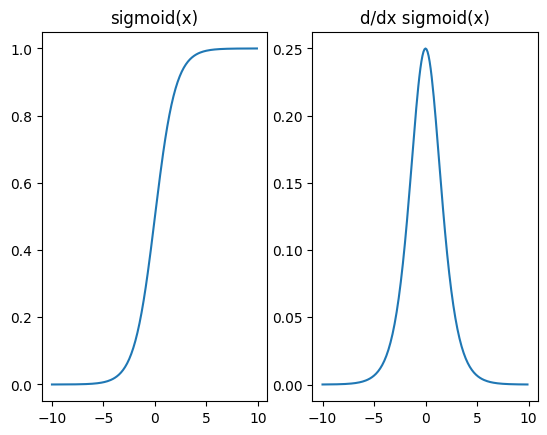

In [ ]:
# sigmoid함수와 기울기 그래프 그리기.

sigmoid = Sigmoid()
x = np.arange(-10, 10, 0.1)
y1 = sigmoid.forward(x)
y2 = sigmoid.forward(x) * (1 - sigmoid.forward(x))
plt.subplot(121)
plt.title("sigmoid(x)")
plt.plot(x,y1)
plt.subplot(122)
plt.title("d/dx sigmoid(x)")
plt.plot(x,y2)
plt.show

# Relu layer

Relu layer는 affin층을 통과한 데이터에 활성화함수중 하나인 relu함수를 적용한다. relu함수는 0을포함한 0보다작은 값은 0으로, 0보다큰값은 그대로 출력하는 함수이다.
 relu함수를 사요하면 sigmoid함수의 gradient vanashing문제를 극복할 수 있고, 간단한 함수인 만큼 모델학습속도가 매우 빠르다는 장점이 있다.
 하지만 단점도 있는데, 음수값을 입력받으면 무조건 0을 반환하고 기울기또한 0이기 때문에 가중치업데이트가 안되는 현상이 발생할 수 있다. 이런 현상을 죽어가는 렐루현상?이라고 한다.
\
\
\
forward
\
\
$ y = \begin{cases} x, & x>0 \\ 0, & x<=0  \end{cases} $
\
\
\
backward
\
\
밑의 그래프를 보면 함수의 그래프가 매우 간단하므로 쉽게 기울기를 구할 수 있다.
\
\
$ \frac{\partial y}{\partial x} = \begin{cases} 1, & x>0 \\ 0, & x<=0 \end{cases}$

(*원래 0에서는 미분이 불가능 하다.)

즉 relu layer의 역전파는 체인룰에 의해 흘러들어온 미분에 0이나 1을 곱하는 과정이 된다.


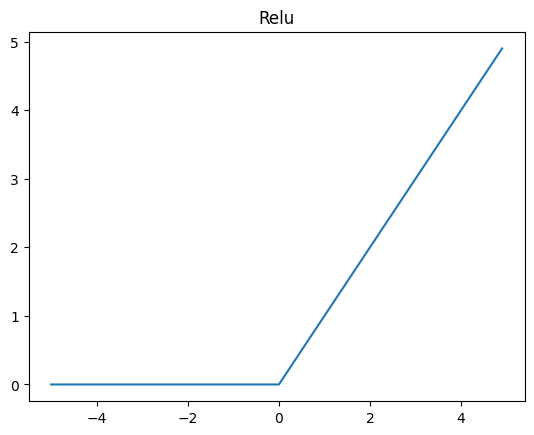

In [ ]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0) # self.mask는 0보다 크면 false 0보다 작으면 true인 리스트를 반환한다.
        out = x.copy()
        out[self.mask] = 0 # mask true인 부분을 모두 0으로 반환한다.

        return out

    def backward(self, dout):
        dout[self.mask] = 0 # 주의할점은 흘러들어온 미분값의 부호에 의해 1이나 0을 곱하는것이 정해지는게 아니라 위의 x값을 기준으로 gradient를 살리거나 죽이게 된다.
        dx = dout

        return dx

In [ ]:
# Relu함수 그래프 그리기

relu = Relu()
x = np.arange(-5, 5, 0.1)
y = relu.forward(x)

plt.plot(x, y)
plt.title('Relu')
plt.show

# Softmax with Loss layer

1.Softmax

softmax함수는 입력벡터를 확률분포로 변환한다. 예를들어 모델이 1부터 10까지의 숫자 이미지를보고 어떤숫자인지 예측할때 소프트맥스 함수는 입력이미지가 각 숫자일 확률을 벡터로 표현할 수 있다. 당연히 확률벡터의 모든 원소의 합은 1이 된다.
\
\
\
forward
\
\
$ softmax(x^i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}} $
\
\
softmax함수가 단순히 $ \frac{x_i}{\sum_{j=1}^{n} x_j} $ 로 표현되지 않고 굳이 자연상수 e를 사용해 표현되는 이유는 우선 지수 함수를 사용해 입력값의 차이를 더 명확하게 하기위함이고 또, backpropagation과정에서 미분계산을 더 용이하게 하기 위해서 이다.
\
\
\
2.Cross entropy(https://insomnia.tistory.com/12)

크로스엔트로피는 모델에서 예측한 확률값이 실제값과 비교했을 때 틀릴 수 있는 정보량을 의미한다. 크로스 엔트로피를 이해하기위해 우선 엔트로피를 살펴보자. 엔트로피는 불확실성(정보량)을 의미하며

$H(x) = \sum_{j=1}^{n} log \frac{1}{p_i} p_i$ 로 표현된다.